# Project W4: Kaggle-Human Freedom

*Insert intro here*

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Preparing data

In [2]:
data = pd.read_csv('.\datasets\hfi_cc_2018.csv')
data_2 = pd.read_csv('.\datasets\dataset2.csv')

In this section we filter our original datasets. The first dataset had a lot of indicators (79), so we needed to decide which ones we would use. We tackled this issue by finding out the percentage of missing values for each indicator, from there on we decided to drop indicators which had more than 10% missing values, leaving us with ... indicators. We didn't have full data on all countries, since some were added to the Human Freedom Index later on. In order to get a more accurate results, we found countries with missing data and removed them. While filtering the second dataset, it turned out that data before 2010 wasn't sufficient, so we removed years 2008 and 2009 from our first dataset.

### First dataset  -insert name here-

In [3]:
pd.set_option('display.max_rows', None)

 # Mitu % andmetest on puudu

data = data[[
'year',
'countries',
'region',
'pf_rol',
'pf_ss_homicide',
'pf_ss_disappearances',
'pf_ss_women_missing',
'pf_ss_women_inheritance',
'pf_ss_women',
'pf_ss',
'pf_movement',
'pf_religion',
'pf_expression',
'pf_identity_parental',
'pf_identity_sex',
'pf_score',
'pf_rank',
'ef_government_tax_income',
'ef_government_tax',
'ef_government',
'ef_legal_military',
'ef_legal_enforcement',
'ef_legal_police',
'ef_legal',
'ef_money_growth',
'ef_money_inflation',
'ef_money',
'ef_trade_tariffs_mean',
'ef_trade_regulatory',
'ef_trade_black',
'ef_trade_movement_capital',
'ef_trade_movement_visit',
'ef_trade_movement',
'ef_trade',
'hf_score',
'hf_rank',]]

#### We have picked out the following inidicators:

| Indicator name | Explanation |
|------|------|
| Year | - |
| Countries | Name of country |
| Region | - |
| pf_rol | Rule of law |
| pf_ss_homicide | Homicide |
| pf_ss_disappearances | Disappearances, conflict, and terrorism |
| pf_ss_women_missing | Missing women |
| pf_ss_women_inheritance | Inheritance |
| pf_ss_women | Women's security |
| pf_ss | Security and safety |
| pf_movement | Freedom of movement |
| pf_religion | Religious freedom |
| pf_expression | Freedom of expression |
| pf_identity_parental | Parental rights |
| pf_identity_sex | Same-sex ralitionships |
| pf_score | Personal Freedom (score) |
| pf_rank | Personal Freedom (rank) |
| ef_government_tax_income | Top marginal income tax rate |
| ef_government_tax | Top marginal tax rate |
| ef_government | Size of government |
| ef_legal_military | Military interference in rule of law and politics |
| ef_legal_enforcement | Legal enforcement of contracts |
| ef_legal_police | Reliability of police |
| ef_legal | Legal system and property rights |
| ef_money_growth | Money growth |
| ef_money_inflation | Inflation: most recent year |
| ef_money | Sound money |
| ef_trade_tariffs_mean | Mean tariff rate |
| ef_trade_regulatory | Regulatory trade barriers |
| ef_trade_black | Black-market exchange rates |
| ef_trade_movement_capital | Capital controls |
| ef_trade_movement_visit | Freedom of foreigners to visit |
| ef_trade_movement | Controls of the movement of capital and people |
| ef_trade | Freedom to trade internationally |
| hf_score | Human Freedom (score) |
| hf_rank | Human Freedom (rank) |

In [4]:
eemaldatavad_riigid = set(data.loc[(data["pf_rank"].isnull()) & (data["year"] == 2010)]["countries"].tolist()) #Valime välja riigid millel puudub varasem info

eemaldatavad_aastad = [2008, 2009]

for riik in eemaldatavad_riigid:
    data = data[~data["countries"].isin(eemaldatavad_riigid)] #Eemaldame riigid

for aasta in eemaldatavad_aastad:
    data = data[~data["year"].isin(eemaldatavad_aastad)] #Eemaldame aastad mille kohta meil on vähem infot

olemasolevad_riigid = set(data["countries"].tolist())

#### We removed the following countries from our data:

In [5]:
print(*eemaldatavad_riigid, sep = ", ")

Sudan, Seychelles, Iraq, Laos, Libya, Bhutan, Liberia, Guinea, Belarus


### Second dataset -insert name here-

We went through a similar procedure with our second dataset. At first we chose indicators that interested us, later on we found the percentage of missing values for all indicators and made adjustments in our choices. Since the data before 2010 had a lot of missing values, we decided to narrow our data down to 2010 - 2018.

In [6]:
before_2016_data = data_2[data_2['Year'] == 2008]
before_2016_data['Year'].value_counts()
temp_data = before_2016_data[before_2016_data.isnull().sum(axis = 1) < 2]
temp_data.isnull().sum(axis = 1)
data_2 = data_2[data_2["Country Name"].isin(olemasolevad_riigid)] #Valime samad riigid mida kasutame esimeses andmestikus


In [7]:
print("Indicator, % of missing values")
print(data_2.isnull().mean() * 100)
eemaldatavad_tulbad = ["Expense (% of GDP)", "Revenue, excluding grants (% of GDP)", "Population, female", "Population, male"]
data_2 = data_2.drop(eemaldatavad_tulbad, axis = 1)

Indicator, % of missing values
Country Name                                            0.000000
Expense (% of GDP)                                     25.373134
Land area (sq. km)                                      0.000000
Life expectancy at birth, total (years)                 0.000000
Military expenditure (% of GDP)                         5.597015
Population density (people per sq. km of land area)     0.000000
Population, female                                      0.000000
Population, male                                        0.000000
Population, total                                       0.000000
Revenue, excluding grants (% of GDP)                   23.880597
Year                                                    0.000000
GDP                                                     0.000000
dtype: float64


#### We are left with the following indicators:

In [8]:
print(*data_2.columns.tolist(), sep = ", ")

Country Name, Land area (sq. km), Life expectancy at birth, total (years), Military expenditure (% of GDP), Population density (people per sq. km of land area), Population, total, Year, GDP


#### Since this dataset didn't have GPD we decided to add it:

In [9]:
gdp_data = pd.read_csv('.\datasets\gdp_data.csv')

gdp_data = gdp_data.drop(columns=['Country Code', 'Series Name', 'Series Code', '1990 [YR1990]', '2000 [YR2000]', '2019 [YR2019]', '2017 [YR2017]', '2018 [YR2018]'])

for year in range(2010, 2017, 1):
    gdp_data.rename(columns={(str(year) + " [YR" + str(year) + "]"): year}, inplace=True)

gdp_data = gdp_data.melt(id_vars=["Country Name"], 
        var_name="Year", 
        value_name="GDP")

#gdp_data = gdp_data.loc[gdp_data['Country Name'] in data_2['Country Name']]

gdp_data = gdp_data.reset_index()
for i in range(len(gdp_data)):
    if (gdp_data.loc[i]['Country Name']) not in set(data_2['Country Name']):
        gdp_data = gdp_data.drop(i, axis=0)

#data_2 = data_2.merge(gdp_data, on=['Country Name', 'Year'], how='inner').drop(columns=['index'])
#data_2.to_csv("dataset2.csv", index=False)

#### Now that both of our datasets are prepared, we will merge them:

In [10]:
data_2 = data_2.rename(columns={'Year': 'year', 'Country Name': 'countries'}) #renaming some columns for merging purposes
merged_data = pd.merge(data, data_2, on=['year', 'countries'])
merged_data.tail()

,year,countries,region,pf_rol,pf_ss_homicide,pf_ss_disappearances,pf_ss_women_missing,pf_ss_women_inheritance,pf_ss_women,pf_ss,...,ef_trade_movement,ef_trade,hf_score,hf_rank,Land area (sq. km),"Life expectancy at birth, total (years)",Military expenditure (% of GDP),Population density (people per sq. km of land area),"Population, total",GDP
1067,2010,Uruguay,Latin America & the Caribbean,6.400000,7.569949,10.000000,10.0,10.0,10.000000,9.189983,...,7.815739,8.137300,8.073788,31.0,175020.0,76.750,1.875808,19.193664,3359275.0,40284481651.9021
1068,2010,Vietnam,South Asia,5.600000,9.395971,10.000000,10.0,10.0,10.000000,9.798657,...,2.223588,6.283764,6.504936,112.0,310070.0,74.837,2.305049,283.702554,87967651.0,115931749697.241
1069,2010,"Yemen, Rep.",Middle East & North Africa,4.043714,8.137823,5.599981,5.0,5.0,6.666667,6.801490,...,3.514609,7.079297,5.425224,146.0,527970.0,65.549,4.685557,43.856384,23154855.0,30906749533.221
1070,2010,Zambia,Sub-Saharan Africa,4.400000,7.649103,10.000000,10.0,0.0,6.666667,8.105257,...,6.772492,7.161020,6.718691,95.0,743390.0,55.655,1.382593,18.302619,13605984.0,20265556273.582
1071,2010,Zimbabwe,Sub-Saharan Africa,3.700000,7.981019,6.492428,10.0,5.0,8.166667,7.546705,...,2.458793,4.907822,4.909415,153.0,386850.0,50.640,0.976401,32.823376,12697723.0,12041655200


## Finding correlations

(34.0, 0.0)

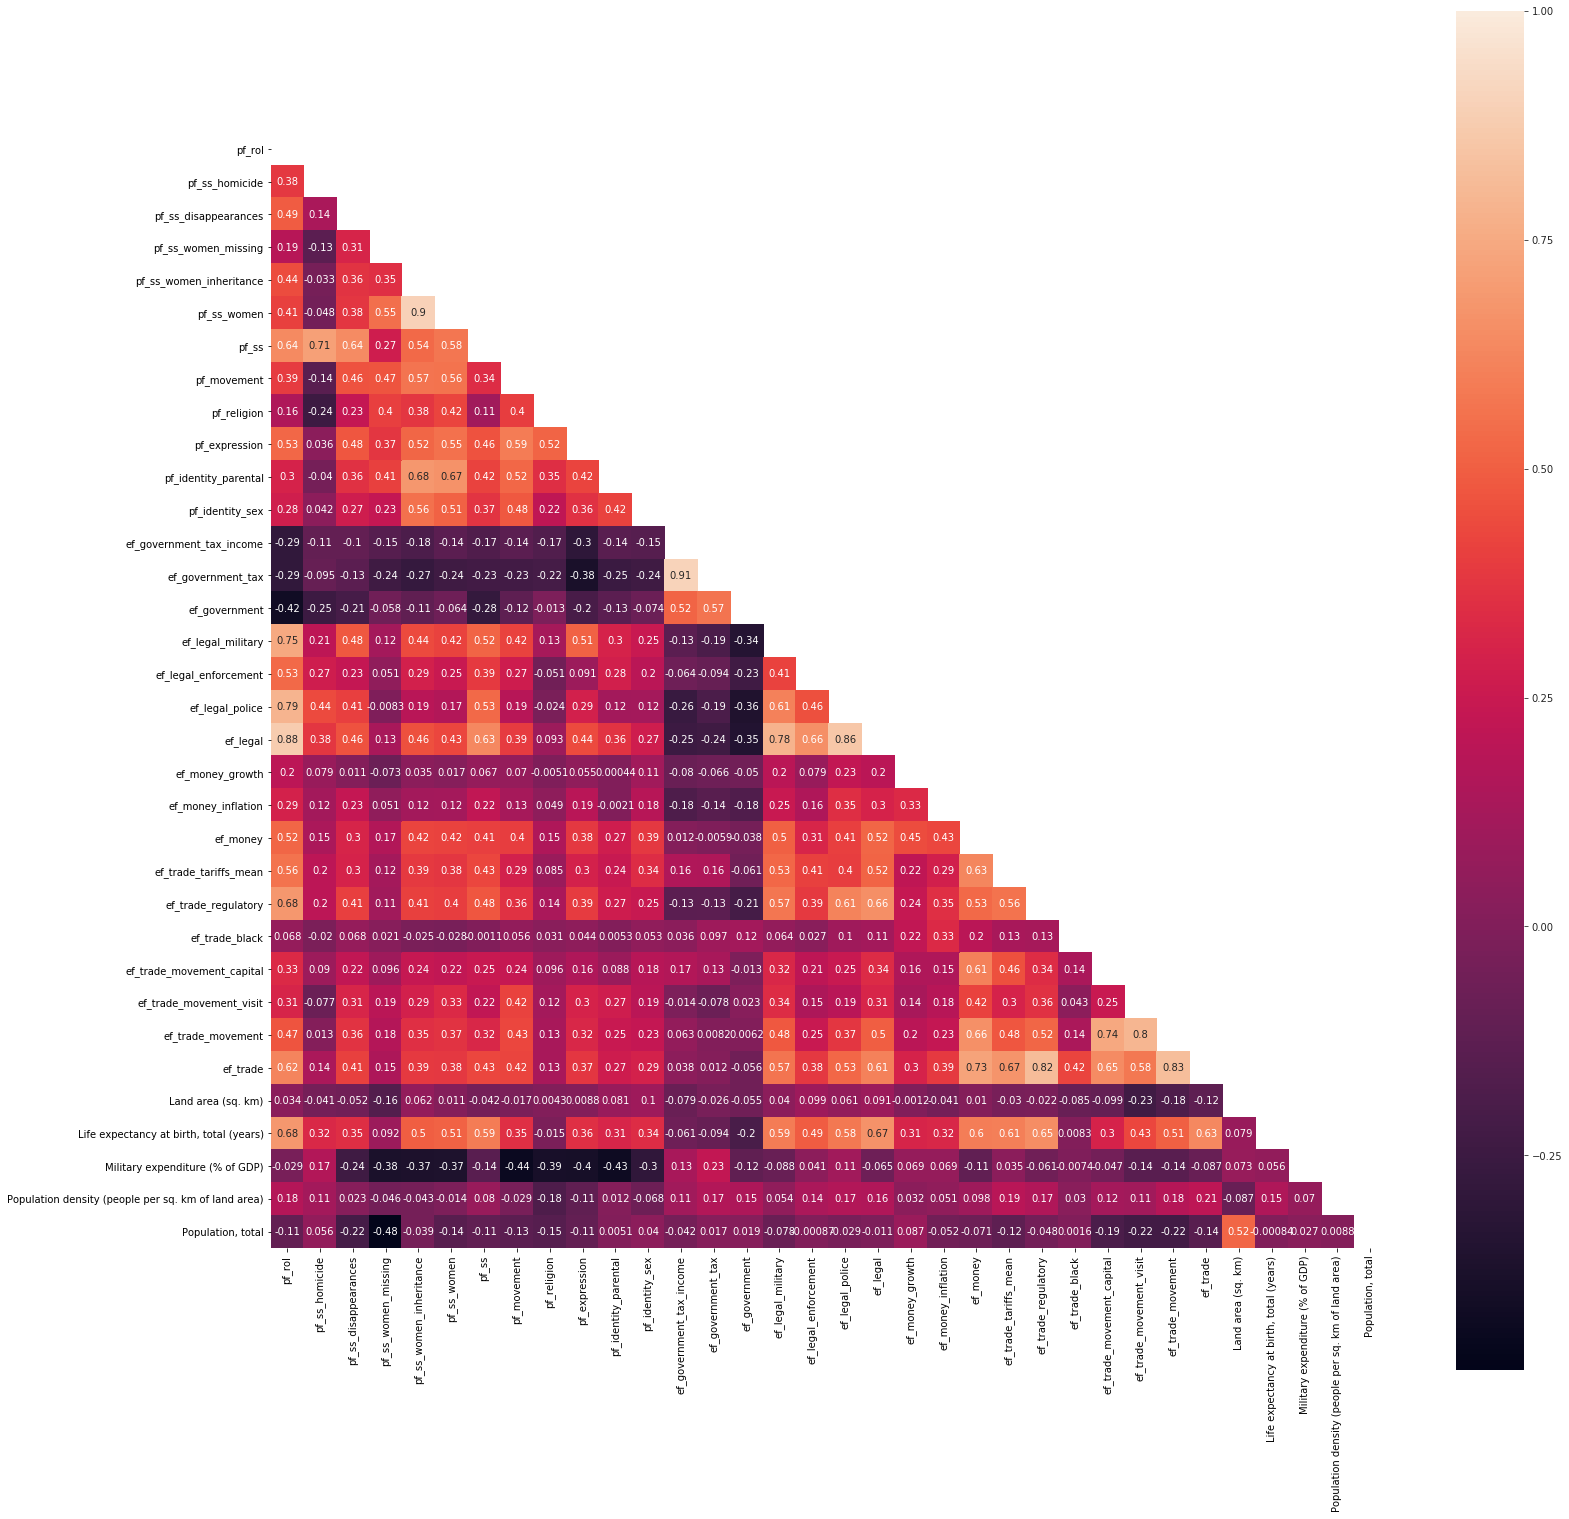

In [11]:
correlations = merged_data.drop(columns = ["year", "pf_rank", "pf_score", "hf_rank", "hf_score"]).corr()
fig, ax = plt.subplots(figsize=(25,25))
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(correlations, square = True, annot = True,ax = ax, mask = mask)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)